In [1]:
from __future__ import print_function
from __future__ import division

In [2]:
%matplotlib inline

In [3]:
import sympy
sympy.init_printing()

First-order systems with proportional control
---------------------------------------------

In [4]:
s = sympy.Symbol('s')
tau = sympy.Symbol('tau', positive=True)

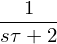

In [5]:
G = 1/(tau*s + 2)
G

In [6]:
K = K_C = sympy.Symbol('K_C', positive=True)

In [7]:
G_OL = G*K_C

In [8]:
def feedback(forward, backward):
    loop = forward*backward
    return sympy.simplify(forward/(1 + loop))

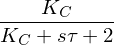

In [9]:
G_CL = feedback(G_OL, 1)
G_CL

In [10]:
t = sympy.Symbol('t', positive=True)

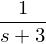

In [11]:
real_CL = G_CL.subs({K_C: 1, tau: 1})
sympy.simplify(real_CL)

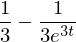

In [12]:
timeresponse = sympy.inverse_laplace_transform(sympy.simplify(real_CL/s), s, t)
timeresponse

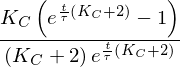

In [13]:
general_timeresponse = sympy.inverse_laplace_transform(sympy.simplify(G_CL/s), s, t)
general_timeresponse

In [14]:
def response(new_K_C, new_tau):
    sympy.plot(general_timeresponse.subs({K_C: new_K_C, tau: new_tau}), 1, (t, 0, 4))

In [15]:
from ipywidgets import interact

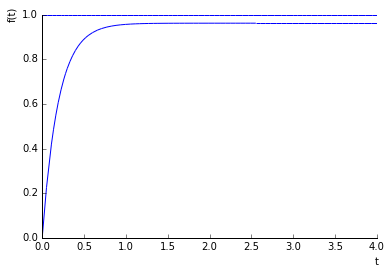

<function __main__.response>

In [16]:
interact(response, new_K_C=(0, 100), new_tau=(0, 20))

Second order system with proportional control
---------------------------------------------

In [17]:
import matplotlib.pyplot as plt

In [18]:
zeta = sympy.Symbol('zeta')

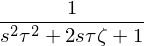

In [19]:
G = 1/(tau**2*s**2 + 2*tau*zeta*s + 1)
G

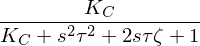

In [20]:
G_CL = feedback(G*K, 1)
G_CL

In [21]:
def response(new_K_C, new_tau, new_zeta):
    real_CL = G_CL.subs({K_C: new_K_C, tau: new_tau, zeta: new_zeta})
    timeresponse = sympy.inverse_laplace_transform(sympy.simplify(real_CL/s), s, t)
    sympy.plot(timeresponse, 1, (t, 0, 10))
    poles = sympy.solve(sympy.denom(sympy.simplify(real_CL)), s)
    plt.plot([sympy.re(p) for p in poles], [sympy.im(p) for p in poles], 'x', markersize=10)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.axis([-5, 5, -5, 5])

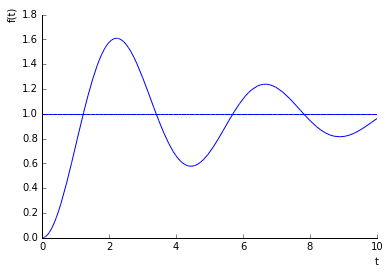

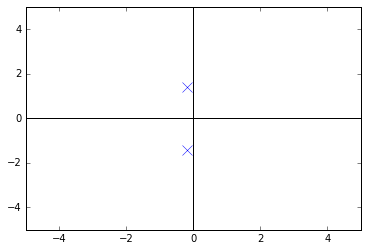

In [22]:
interact(response, new_K_C=(0, 100), new_tau=(0, 10.), new_zeta=(0, 2.));